## Trabalhando com Datas

In [ ]:
#Importando a biblioteca pandas
import pandas as pd

In [2]:
#Leitura dos arquivos
df1 = pd.read_excel("/content/drive/MyDrive/Datasets/Aracaju.xlsx")
df2 = pd.read_excel("/content/drive/MyDrive/Datasets/Fortaleza.xlsx")
df3 = pd.read_excel("/content/drive/MyDrive/Datasets/Natal.xlsx")
df4 = pd.read_excel("/content/drive/MyDrive/Datasets/Recife.xlsx")
df5 = pd.read_excel("/content/drive/MyDrive/Datasets/Salvador.xlsx")

In [3]:
#Juntando todas as planilhas
df = pd.concat([df1, df2, df3, df4, df5])

In [ ]:
#Transformando a coluna de data em tipo inteiro
df["Data"] = df["Data"].astype("int64")

In [8]:
df["Receita"] = df["Vendas"].mul(df["Qtde"])

In [6]:
#Transformando a coluna de data em data
df["Data"] = pd.to_datetime(df["Data"])

In [9]:
df.dtypes

Cidade             object
Data       datetime64[ns]
Vendas            float64
LojaID              int64
Qtde                int64
Receita           float64
dtype: object

In [10]:
#Agrupamento por ano
df.groupby(df["Data"].dt.year)["Receita"].sum()

Data
2018    118176.53
2019    228246.45
Name: Receita, dtype: float64

In [12]:
#Criando uma coluna com o ano
df["Ano_venda"] = df["Data"].dt.year

In [13]:
df.head()

,Cidade,Data,Vendas,LojaID,Qtde,Receita,Ano_venda
0,Aracaju,2018-01-01,142.00,1520,1,142.00,2018
1,Aracaju,2018-01-01,14.21,1522,6,85.26,2018
2,Aracaju,2018-01-01,71.55,1520,1,71.55,2018
3,Aracaju,2018-01-01,3.01,1521,7,21.07,2018
4,Aracaju,2018-01-01,24.51,1522,8,196.08,2018


In [16]:
#Extraindo o mês e o dia
df["mes_venda"], df["dia_venda"] = (df["Data"].dt.month, df["Data"].dt.day)

In [18]:
df.sample(5)

,Cidade,Data,Vendas,LojaID,Qtde,Receita,Ano_venda,mes_venda,dia_venda
130,Fortaleza,2019-03-02,12.36,983,4,49.44,2019,3,2
12,Natal,2019-02-02,709.00,853,3,2127.00,2019,2,2
40,Salvador,2019-02-13,161.87,1036,3,485.61,2019,2,13
39,Recife,2019-01-01,143.58,981,3,430.74,2019,1,1
97,Aracaju,2018-01-01,32.69,1521,5,163.45,2018,1,1


In [19]:
#Retornando a data mais antiga
df['Data'].min()

Timestamp('2018-01-01 00:00:00')

In [20]:
#Calculando a diferença de dias entre datas
df["diferenca_dias"] = df['Data'] - df['Data'].min()

In [21]:
df.sample(5)

,Cidade,Data,Vendas,LojaID,Qtde,Receita,Ano_venda,mes_venda,dia_venda,diferenca_dias
121,Aracaju,2018-01-01,162.07,1520,3,486.21,2018,1,1,0 days
28,Natal,2019-02-13,705.00,853,2,1410.00,2019,2,13,408 days
124,Salvador,2019-03-02,44.82,1034,3,134.46,2019,3,2,425 days
64,Salvador,2019-01-01,37.96,1037,3,113.88,2019,1,1,365 days
117,Salvador,2019-03-02,39.41,1034,1,39.41,2019,3,2,425 days


In [22]:
#Criando a coluna de trimestre
df["trimestre_venda"] = df["Data"].dt.quarter

In [23]:
df.sample(5)

,Cidade,Data,Vendas,LojaID,Qtde,Receita,Ano_venda,mes_venda,dia_venda,diferenca_dias,trimestre_venda
199,Salvador,2019-01-02,153.87,1036,3,461.61,2019,1,2,366 days,1
17,Aracaju,2018-01-01,162.19,1522,9,1459.71,2018,1,1,0 days,1
88,Salvador,2019-01-01,31.20,1036,1,31.20,2019,1,1,365 days,1
30,Fortaleza,2019-01-01,39.13,1005,6,234.78,2019,1,1,365 days,1
106,Fortaleza,2019-01-01,28.42,1002,3,85.26,2019,1,1,365 days,1


In [27]:
#Filtrando as vendas de 2019 do mês de março
vendas_marco_19 = df.loc[(df['Data'].dt.year == 2019) & (df["Data"].dt.month == 3)]

In [28]:
vendas_marco_19

,Cidade,Data,Vendas,LojaID,Qtde,Receita,Ano_venda,mes_venda,dia_venda,diferenca_dias,trimestre_venda
108,Fortaleza,2019-03-02,152.89,981,4,611.56,2019,3,2,425 days,1
109,Fortaleza,2019-03-02,18.90,982,6,113.40,2019,3,2,425 days,1
110,Fortaleza,2019-03-02,51.98,983,6,311.88,2019,3,2,425 days,1
111,Fortaleza,2019-03-02,8.00,981,3,24.00,2019,3,2,425 days,1
112,Fortaleza,2019-03-02,133.59,982,1,133.59,2019,3,2,425 days,1
...,...,...,...,...,...,...,...,...,...,...,...
137,Salvador,2019-03-02,51.66,1036,3,154.98,2019,3,2,425 days,1
138,Salvador,2019-03-02,212.03,1037,3,636.09,2019,3,2,425 days,1
139,Salvador,2019-03-02,169.01,1036,1,169.01,2019,3,2,425 days,1
140,Salvador,2019-03-02,20.79,1036,2,41.58,2019,3,2,425 days,1


# Visualização de dados

### Aula 07

In [29]:
#Fazer uma contagem no conjunto de dados, contando quantas linhas possuem em cada LojaID
df['LojaID'].value_counts(ascending=False)

1036    117
1035    112
1037    101
1034     67
983      65
982      44
1522     41
1520     39
980      36
981      31
1005     30
1002     30
852      29
1523     29
1004     28
854      28
853      26
1521     21
1003     20
Name: LojaID, dtype: int64

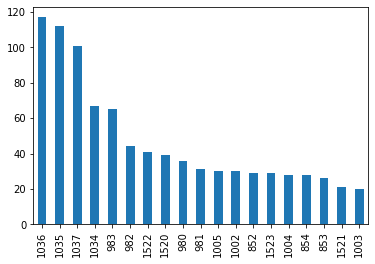

In [30]:
#Gráfico de barras
df['LojaID'].value_counts(ascending=False).plot.bar()

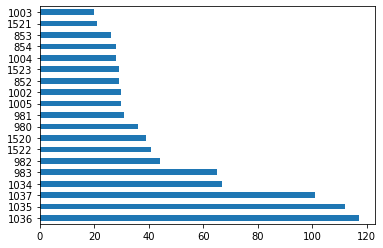

In [31]:
#Gráfico de barras horizontais
df['LojaID'].value_counts(ascending=False).plot.barh()

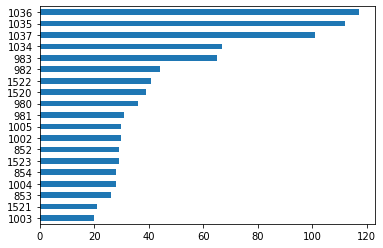

In [32]:
#Gráfico de barras horizontais
df['LojaID'].value_counts(ascending=True).plot.barh()

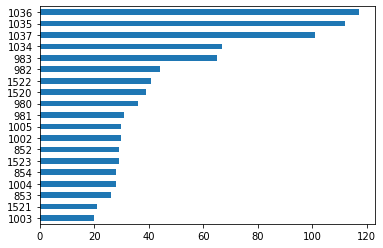

In [33]:
#Gráfico de barras horizontais. Para eliminar a linha impressa acima do gráfico, utilizamos o ; no final do código
df['LojaID'].value_counts(ascending=True).plot.barh();

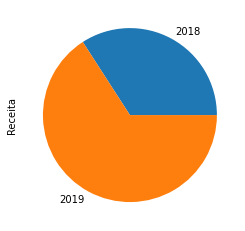

In [35]:
#Gráfico de pizza
df.groupby(df["Data"].dt.year)["Receita"].sum().plot.pie();

In [36]:
#Total de vendas por cidade
df["Cidade"].value_counts()

Natal        240
Salvador     240
Fortaleza    142
Recife       142
Aracaju      130
Name: Cidade, dtype: int64

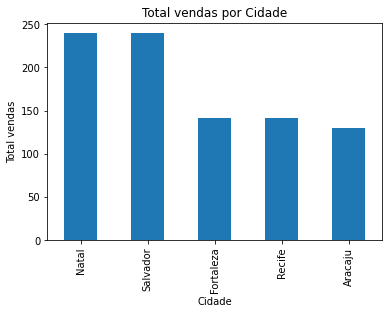

In [37]:
#Adicionando um titulo e alterando o nome dos eixos
import matplotlib.pyplot as plt
df["Cidade"].value_counts().plot.bar(title="Total vendas por Cidade")
plt.xlabel("Cidade")
plt.ylabel("Total vendas");

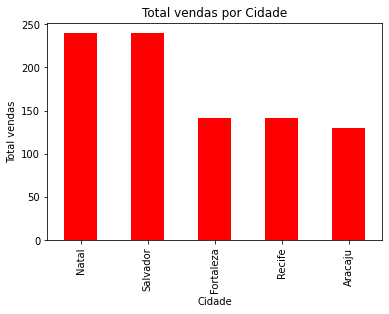

In [38]:
#Alterando a cor
df["Cidade"].value_counts().plot.bar(title="Total vendas por Cidade", color="red")
plt.xlabel("Cidade")
plt.ylabel("Total vendas");

In [39]:
#Alterando o estilo do gráfico
plt.style.use("ggplot")

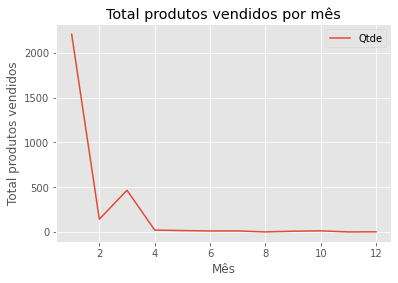

In [44]:
#Gráfico agrupado por mês de venda com base na quantidade de vendas
df.groupby(df["mes_venda"])["Qtde"].sum().plot(title="Total produtos vendidos por mês")
plt.xlabel("Mês")
plt.ylabel("Total produtos vendidos")
plt.legend();

In [45]:
#Somando a quantidade de vendas por mês
df.groupby(df["mes_venda"])["Qtde"].sum()

mes_venda
1     2208
2      144
3      467
4       23
5       17
6       13
7       13
8        2
9       10
10      14
11       2
12       3
Name: Qtde, dtype: int64

In [46]:
#Selecionando apenas as vendas de 2019
df_2019 = df[df["Ano_venda"] == 2019]

In [48]:
df_2019.groupby(df_2019['mes_venda'])["Qtde"].sum()

mes_venda
1    1541
2     128
3     460
4      12
Name: Qtde, dtype: int64

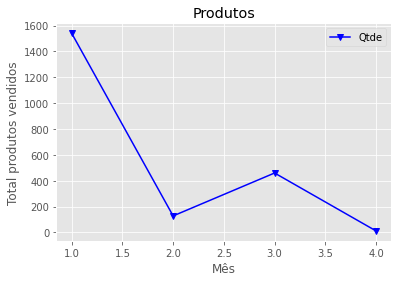

In [50]:
#Total de produtos vendidos por mês em 2019. (Adicionando um marcador)
df_2019.groupby(df_2019["mes_venda"])["Qtde"].sum().plot(title="Produtos", marker="v", color="blue")
plt.xlabel("Mês")
plt.ylabel("Total produtos vendidos")
plt.legend()

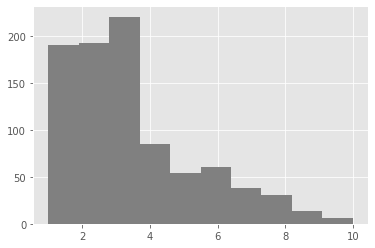

In [55]:
#Hisograma
plt.hist(df["Qtde"], color="gray");

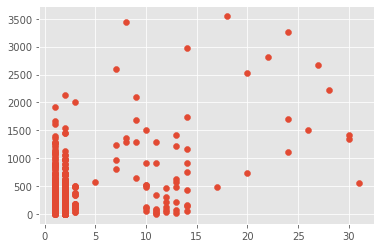

In [56]:
#Gráfico de dispersão
plt.scatter(x=df_2019['dia_venda'], y=df_2019["Receita"]);

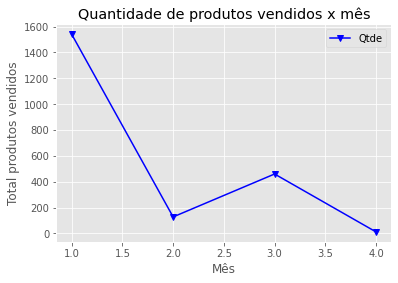

In [58]:
#Salvando gráfico em png
df_2019.groupby(df_2019["mes_venda"])["Qtde"].sum().plot(marker="v", color="blue")
plt.title("Quantidade de produtos vendidos x mês")
plt.xlabel("Mês")
plt.ylabel("Total produtos vendidos")
plt.legend()
plt.savefig("gráfico QTDE x MES.png")